In [2]:
import os
import math
import random
import shutil
import scipy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

import tensorflow as tf
from keras import Model
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, LearningRateScheduler

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce RTX 4070, compute capability 8.9
(1, 64, 64, 1)
1/1 [==============================] - 2s 2s/step
Class: 3002, Probability: 0.9146
Class: 3001, Probability: 0.0623
Class: 11212, Probability: 0.0160


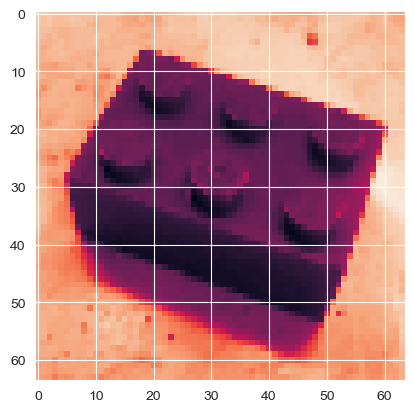

In [3]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from PIL import Image

BASE_DIR = 'data/'
OG_DATA_DIR = 'data/64/'
subfolders = next(os.walk(OG_DATA_DIR))[1]

# Load the trained model
model = tf.keras.models.load_model('lego_model_4layer_bw.h5')

# Define the target size (assuming your model expects images of size 64x64)
target_size = (64, 64)

# Load and preprocess the image
image_path = 'data/test_3002.jpeg'
image = load_img(image_path, target_size=target_size, color_mode="grayscale")
# image.save('data/test_3002 (2).jpeg')

# image = Image.open('data/test_3002.jpeg').convert('L')
image_array = img_to_array(image)
image_array = image_array / 255.0  # Normalize pixel values
plt.imshow(image_array)
# Add an extra dimension to the image array to match the input shape expected by the model
image_array = np.expand_dims(image_array, axis=0)
print(image_array.shape)

# Perform inference
predictions = model.predict(image_array)

# Get top 3 predicted classes and their probabilities
top_classes_idx = np.argsort(predictions[0])[-3:][::-1]  # Indices of top 3 classes
top_classes_prob = predictions[0][top_classes_idx]  # Probabilities of top 3 classes
top_classes_labels = [subfolders[i] for i in top_classes_idx]  # Labels of top 3 classes

# Show the top 3 predicted classes and their probabilities
for label, prob in zip(top_classes_labels, top_classes_prob):
    print(f"Class: {label}, Probability: {prob:.4f}")

In [9]:
model = tf.keras.models.load_model('lego_model_4layer_bw.h5')

converter = tf.lite.TFLiteConverter.from_keras_model(model)

converter.target_spec.supported_ops = [
    tf.lite.OpsSet.TFLITE_BUILTINS, # enable TensorFlow Lite ops.
    tf.lite.OpsSet.SELECT_TF_OPS # enable TensorFlow ops.
]

tflite_model = converter.convert()
open("converted_model2.tflite", "wb").write(tflite_model)

tf.saved_model.save(model, "saved_model")
converter2 = tf.lite.TFLiteConverter.from_saved_model('saved_model') # path to the SavedModel directory
tflite_model2 = converter.convert()

# Save the model.
with open('saved_model.tflite', 'wb') as f:
  f.write(tflite_model2)

INFO:tensorflow:Assets written to: C:\Users\faiza\AppData\Local\Temp\tmpeq3r3nb7\assets


INFO:tensorflow:Assets written to: C:\Users\faiza\AppData\Local\Temp\tmpeq3r3nb7\assets


INFO:tensorflow:Assets written to: saved_model\assets


INFO:tensorflow:Assets written to: saved_model\assets


INFO:tensorflow:Assets written to: C:\Users\faiza\AppData\Local\Temp\tmpqoceg50c\assets


INFO:tensorflow:Assets written to: C:\Users\faiza\AppData\Local\Temp\tmpqoceg50c\assets


In [10]:
!pip install tflite-support

   ---------------------------------------- 0.0/469.6 kB ? eta -:--:--
   --- ------------------------------------ 41.0/469.6 kB 1.9 MB/s eta 0:00:01
   ---------------------------------------  460.8/469.6 kB 7.2 MB/s eta 0:00:01
   ---------------------------------------- 469.6/469.6 kB 5.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/235.0 kB ? eta -:--:--
   ---------------------------------------- 235.0/235.0 kB ? eta 0:00:00
   ---------------------------------------- 0.0/200.1 kB ? eta -:--:--
   ---------------------------------------- 200.1/200.1 kB ? eta 0:00:00
